In [1]:
import numpy as np
from matplotlib import pyplot as plt
c = 3*10^8                 # m/s
G = 6.67*10**(-11)         # Nm^2/kg^2
u0 = 4*np.pi*10**(-7)      # N/A^2
eps0 = 8.85*10**(-12)        # C^2/(N*m^2)
e = 1.6*10**(-19)          # C
mp = 1.67*10**(-19)        # kg
me = 9.11*10**(-31)        # kg
Msun = 2*10**(30)          # kg
sigma = 6*10**22           # Hz

In [2]:
class Star:
    def __init__(self, M, w, R, M_frac):
        self.M = M
        self.w = w
        self.R = R
        self.N = M_frac*M/(mp+me)
    def L(self):
        return (2/5)*self.M*self.w*self.R**2

In [19]:
def Bgm(N_Star, R_loc):
    M = -(1/2)*N_Star.L()*np.sqrt(G)/c
    return np.array([2*M*np.sin(R_loc[1])/(R_loc[0])**3, M*np.sin(R_loc[1])/(R_loc[0]**3), 0])

In [4]:
def Generate_Loops(Nl, N_Star):
    Cyl_loops_r = np.arange(.1, N_Star.R +1, N_Star.R/Nl)
    Cyl_loops_z = np.arange(-N_Star.R, N_Star.R + 1,  N_Star.R/Nl)
    #print(Cyl_loops_z)
    Loops = []
    L = 0
    #k = 0
    for r in Cyl_loops_r:
        for z in Cyl_loops_z:
            if r**2 + z**2 <= N_Star.R**2:
                Loops.append([r,z])
    i = 0
    while i < len(Loops):
        k = Loops[i]
        L = L + 2*np.pi*k[0]
        i = i + 1
        #print(L)
    i = 0
    while i < len(Loops):
        Loops[i] = Loops[i]+[N_Star.N/(L)]
        i = i + 1
    #print(Loops)
    return Loops

In [5]:
def J_init(N_Star, loop):
    n = loop[2]
    #print(n)
    R_loc = np.array([loop[0], np.arctan(np.sqrt(loop[0]**2+loop[1]**2))/loop[1],0])
    if R_loc[1] >= 1000:
        R_loc[1] = 0
    i = 0
    v = R_loc[0]*N_Star.w*np.array([0,0,1])
    lc = e*n
    return R_loc, v, lc

In [6]:
def B_em(Loop, Point):
    Bi = 0
    #Q = Loop[0][0]/(np.pi/50)
    Bi = (u0/(4*np.pi*(Point[0] - Loop[0][0])**3))*np.cross(Loop[1], (Point - Loop[0]))    
    Bi = Bi*Loop[2]*Loop[0][0]*2*np.pi
    return Bi

In [13]:
def ElectromagneticBE(N_Star, Nl, deltaT, Point):
    dt = .1
    Nsteps = deltaT/dt
    Loops = Generate_Loops(Nl, N_Star)
    k = 0
    e_loops = []
    while k < len(Loops):
        R, v, I = J_init(N_Star, Loops[k])
        e_descrip = np.array([R, v, I])
        if R[0] < N_Star.R:
            e_loops.append(e_descrip)
        k = k + 1
    k = 0
    p_loops = []
    while k < len(Loops):
        R, v, I = J_init(N_Star, Loops[k])
        #print(R)
        #print(v)
        p_descrip = np.array([R, v, I])
        p_loops.append(p_descrip)
        k = k + 1
    k = 0
    
    #E = 0
    #while k < len(p_loops):
    #    #print(Loops[k][2])
    #    Ei = p_loops[k][2]*np.array([0,0,1]) - (1/c)*np.cross(p_loops[k][1], Bgm(N_Star, p_loops[k][0]))
    #    E = E + Ei
    #    k = k + 1
    #k = 0
    Bem = 0
    while k < len(p_loops):
        Bi = B_em(p_loops[k], Point)
        k = k + 1
        Bem = Bem + Bi
    print("Bgm = ", Bgm(N_Star, Point))
    print("Bem = ", Bem)
    #print(Bem[0]/Bgm(N_Star, Point)[0])
    #print(Bem[1]/Bgm(N_Star, Point)[1])
    return (Bem, Bgm(N_Star, Point))

In [33]:
import numpy as np
from matplotlib import pyplot as plt
c = 3*10^8                 # m/s
G = 6.67*10**(-11)         # Nm^2/kg^2
u0 = 4*np.pi*10**(-7)      # N/A^2
eps0 = 8.85*10**(-12)        # C^2/(N*m^2)
e = 1.6*10**(-19)          # C
mp = 1.67*10**(-19)        # kg
me = 9.11*10**(-31)        # kg
Msun = 2*10**(30)          # kg
sigma = 6*10**22           # Hz

class Star:
    def __init__(self, M, w, R, M_frac):
        self.M = M
        self.w = w
        self.R = R
        self.N = M_frac*M/(mp+me)
    def L(self):
        return (2/5)*self.M*self.w*self.R**2

def Bgm(N_Star, R_loc):
    M = -(1/2)*N_Star.L()*np.sqrt(G)/c
    return np.array([2*M*np.sin(R_loc[1])/(R_loc[0])**3, M*np.sin(R_loc[1])/(R_loc[0]**3), 0])

def Generate_Loops(Nl, N_Star):
    Cyl_loops_r = np.arange(.1, N_Star.R +1, N_Star.R/Nl)
    Cyl_loops_z = np.arange(-N_Star.R, N_Star.R + 1,  N_Star.R/Nl)
    #print(Cyl_loops_z)
    Loops = []
    L = 0
    #k = 0
    for r in Cyl_loops_r:
        for z in Cyl_loops_z:
            if r**2 + z**2 <= N_Star.R**2:
                Loops.append([r,z])
    i = 0
    while i < len(Loops):
        k = Loops[i]
        L = L + 2*np.pi*k[0]
        i = i + 1
        #print(L)
    i = 0
    while i < len(Loops):
        Loops[i] = Loops[i]+[N_Star.N/(L)]
        i = i + 1
    #print(Loops)
    return Loops

def J_init(N_Star, loop):
    n = loop[2]
    #print(n)
    R_loc = np.array([loop[0], np.arctan(np.sqrt(loop[0]**2+loop[1]**2))/loop[1],0])
    if R_loc[1] >= 1000:
        R_loc[1] = 0
    i = 0
    v = R_loc[0]*N_Star.w*np.array([0,0,1])
    lc = e*n
    return R_loc, v, lc

def B_em(Loop, Point):
    Bi = 0
    #Q = Loop[0][0]/(np.pi/50)
    Bi = (u0/(4*np.pi*(Point[0] - Loop[0][0])**3))*np.cross(Loop[1], (Point - Loop[0]))    
    Bi = Bi*Loop[2]*Loop[0][0]*2*np.pi
    return Bi

def ElectromagneticBE(N_Star, Nl, deltaT, Point):
    dt = .1
    Nsteps = deltaT/dt
    Loops = Generate_Loops(Nl, N_Star)
    k = 0
    e_loops = []
    while k < len(Loops):
        R, v, I = J_init(N_Star, Loops[k])
        e_descrip = np.array([R, v, I])
        if R[0] < N_Star.R:
            e_loops.append(e_descrip)
        k = k + 1
    k = 0
    p_loops = []
    while k < len(Loops):
        R, v, I = J_init(N_Star, Loops[k])
        #print(R)
        #print(v)
        p_descrip = np.array([R, v, I])
        p_loops.append(p_descrip)
        k = k + 1
    k = 0
    
    #E = 0
    #while k < len(p_loops):
    #    #print(Loops[k][2])
    #    Ei = p_loops[k][2]*np.array([0,0,1]) - (1/c)*np.cross(p_loops[k][1], Bgm(N_Star, p_loops[k][0]))
    #    E = E + Ei
    #    k = k + 1
    #k = 0
    Bem = 0
    #print(p_loops)
    while k < len(p_loops):
        Bi = B_em(p_loops[k], Point)
        k = k + 1
        Bem = Bem + Bi
    print("Bgm = ", Bgm(N_Star, Point))
    print("Bem = ", Bem)
    #print(Bem[0]/Bgm(N_Star, Point)[0])
    #print(Bem[1]/Bgm(N_Star, Point)[1])
    return (Bem, Bgm(N_Star, Point))

In [43]:
ws = 2*np.pi*np.arange(0, 1020, 20)
log10Bsemr = ws*0
log10Bsemtheta = ws*0
log10Bsgmr = ws*0
log10Bsgmtheta = ws*0
log10Br = ws*0
log10Btheta = ws*0
i = 0
for w in ws:
    Starw = Star(1.4*Msun, w, 20000, .1)
    print(w)
    Bcoupled = ElectromagneticBE(Starw, 100, 1, np.array([4000, np.pi/4, 0]))
    Bemi = Bcoupled[0]
    Bgmi = Bcoupled[1]
    log10Bsemr[i] = np.log10(np.abs(Bemi))[0]
    log10Bsgmr[i] = np.log10(np.abs(Bgmi))[0]
    log10Bsemtheta[i] = np.log10(np.abs(Bemi))[1]
    log10Bsgmtheta[i] = np.log10(np.abs(Bgmi))[1]
    log10Br[i] = np.log10(np.abs(Bgmi+Bemi))[0]
    log10Btheta[i] = np.log10(np.abs(Bemi+Bgmi))[1]
    #print(log10Bsem[i], log10Bsgm[i])
    i = i + 1

0.0


C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars


Bgm =  [-0. -0.  0.]
Bem =  [0. 0. 0.]


C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


125.66370614359172
Bgm =  [-2.30904896e+23 -1.15452448e+23  0.00000000e+00]
Bem =  [6.20014341e+28 7.89427473e+27 0.00000000e+00]
251.32741228718345
Bgm =  [-4.61809793e+23 -2.30904896e+23  0.00000000e+00]
Bem =  [1.24002868e+29 1.57885495e+28 0.00000000e+00]
376.99111843077515
Bgm =  [-6.92714689e+23 -3.46357345e+23  0.00000000e+00]
Bem =  [1.86004302e+29 2.36828242e+28 0.00000000e+00]
502.6548245743669
Bgm =  [-9.23619586e+23 -4.61809793e+23  0.00000000e+00]
Bem =  [2.48005736e+29 3.15770989e+28 0.00000000e+00]
628.3185307179587
Bgm =  [-1.15452448e+24 -5.77262241e+23  0.00000000e+00]
Bem =  [3.10007170e+29 3.94713737e+28 0.00000000e+00]
753.9822368615503
Bgm =  [-1.38542938e+24 -6.92714689e+23  0.00000000e+00]
Bem =  [3.72008604e+29 4.73656484e+28 0.00000000e+00]
879.645943005142
Bgm =  [-1.61633427e+24 -8.08167137e+23  0.00000000e+00]
Bem =  [4.34010039e+29 5.52599231e+28 0.00000000e+00]
1005.3096491487338
Bgm =  [-1.84723917e+24 -9.23619586e+23  0.00000000e+00]
Bem =  [4.96011473e

C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


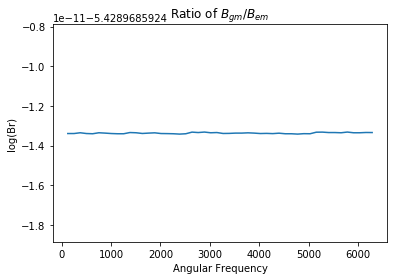

In [47]:
plt.plot(ws, log10Bsgmr - log10Bsemr)
plt.title("Ratio of $B_{gm}/B_{em}$")
plt.ylabel("log(Br)")
plt.xlabel("Angular Frequency")
plt.show()

C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


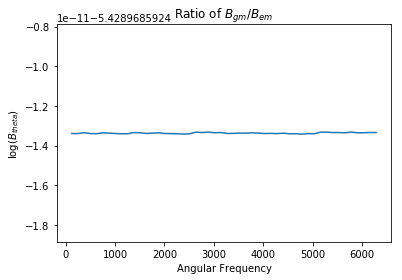

In [48]:
plt.plot(ws, log10Bsgmr - log10Bsemr)
plt.title("Ratio of $B_{gm}/B_{em}$")
plt.ylabel("log($B_{theta}$)")
plt.xlabel("Angular Frequency")
plt.show()

C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


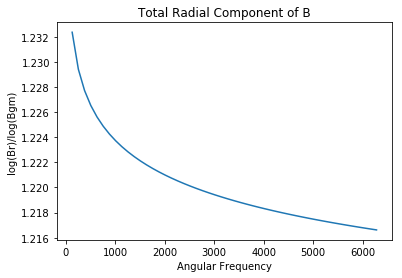

In [46]:
plt.plot(ws, log10Bsemr/log10Bsgmr)
plt.title("Total Radial Component of B")
plt.ylabel("log(Br)/log(Bgm)")
plt.xlabel("Angular Frequency")
plt.show()

C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


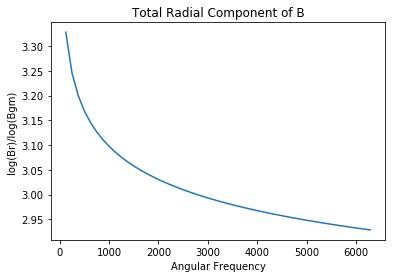

In [32]:
plt.plot(ws, log10Bsemtheta/log10Bsgmtheta)
plt.title("Total Radial Component of B")
plt.ylabel("log(Br)/log(Bgm)")
plt.xlabel("Angular Frequency")
plt.show()